# Elementary Cellular Automaton and Langton's ant

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools
from IPython.display import HTML

# Langton's ant

Langton's ant is an example of a system with very simple rules, but complex behaviour. It can be described as a CA with a two-dimensional grid of binary cells. Cells can be either *black* (**1**) or *white* (**0**). The initial grid contains only white cells and an arbitrarily located ant. The ant is a special cell that travels across the grid. The ant can travel in any of four directions. The direction is determined according to the following rules:
* At a white cell (**0**) ant turns <span style="color:green">90 degree counterclokwise</span>, flips the color of the cell and moves one unit ahead.
* At a black cell (**1**) ant turns <span style="color:red">90 degrees clockwise</span>, flips the color of the cell and moves forward one unit.


Sources and more: [1](https://mathworld.wolfram.com/LangtonsAnt.html), [2](https://en.wikipedia.org/wiki/Langton%27s_ant).

## Langton's ant in Python (2 points)

Fill the gaps in the following code. 

In [18]:
class Ant:
    def __init__(self, xPosition, yPosition, direction):
        # Direction: 0 - north, 1 - east, 2 - south, 3 - west
        self.xPosition = xPosition
        self.yPosition = yPosition
        self.direction = direction
        
    def turnClockwise(self):
        self.direction = (self.direction + 1) % 4
        
    def turnCounterClockwise(self):
        self.direction = (self.direction - 1) % 4
        
    def move(self):
        # TODO Implement ant's movemenet
        if self.direction == 0:
            self.xPosition -= 1
        if self.direction == 2:
            self.xPosition += 1
        if self.direction == 1:
            self.yPosition += 1
        if self.direction == 3:
            self.yPosition -= 1
        return
   

In [25]:
def initGrid(size):
    return np.zeros((size,size))

def show(grid, ant, im):
    newGrid = grid.copy()
    newGrid = 255*newGrid
    newGrid[ant.xPosition,ant.yPosition] = 128
    im.set_data(newGrid) 
    
def update(frameNum, grid, ant, im, size):
    if(frameNum == 0):
        show(grid, ant, im)
    else:
        x = ant.xPosition 
        y = ant.yPosition 
        if grid[x][y] == 0:
            ant.turnClockwise()
            ant.move()
            grid[x][y] = 1
        else:
            ant.turnCounterClockwise()
            ant.move()
            grid[x][y] = 0
        # TODO implementent transition rules   
        # .... 
        show(grid, ant, im)
    return im,



In [26]:
%%capture
# Parameters
size = 10 
steps = 100
ant = Ant(5,5,0)

# Config
fig, ax = plt.subplots(figsize = (14,12))
plt.axis('off')

In [27]:
#Run Simulation
grid = initGrid(size)
im = ax.imshow(grid,  vmin=0, vmax=255)
ani = animation.FuncAnimation(fig, update, frames = steps, fargs = [grid, ant, im, size])

HTML(ani.to_jshtml())

# Elementary Cellular Automaton (4 points)

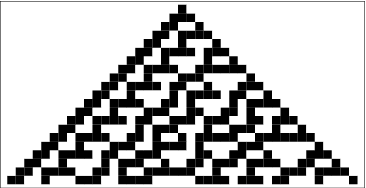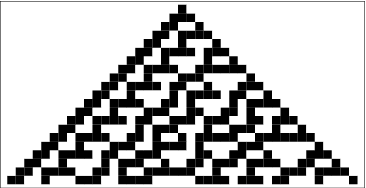Let's consider a very simple CA with a one-dimensional array of binary values. Let's assume that a cell has only two neighbours (the cell on the left and the cell on the right). In such a system there is only 8 possible situation for any three consecutive cells. The rules are often presented in the following form (the first row contains existing cells, the second row shows new values):
![image](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA30Rules_750.gif)

(source: [Wolfram Math World](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)).

This gives $2^8$ possible sets of rules. The rule shown above is called *Rule 30* because the order of 1s and 0s resembles a binary number $00011110_2$ which in the decimal system is equal to 30.

The evolution of elementary cellular automata is often presented in a row-by-row manner:
![image](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA30_1000.gif)

(source: [Wolfram Math World](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)).




## Elementary Cellular Automaton in Python
* Implement the *Rule 30* elementary cellular automaton (1 point).
* Create a rule-independent implementation (rule is passed as a parameter to **run** function) Check the patterns for rules: 60, 62, 182, 250 (2 points)
* Improve the *show* function (change symbols etc.).

In [78]:
def show(row):
    # print(row)
    for a in row:
        if a:
            print('*', end='')
        else:
            print('_', end='')
    print('')

def nextCell(prev, mid, nxt, rule):
    rules = np.zeros(7)
    rule = [int(x) for x in bin(rule)[2:]]
    rules = np.append(rules,rule)
    # Implement rule here
    if rules[-8] and prev and mid and nxt:
        return 1
    if rules[-7] and prev and mid and not nxt:
        return 1    
    if rules[-6] and prev and not mid and nxt:
        return 1
    if rules[-5] and prev and not mid and not nxt:
        return 1
    if rules[-4] and not prev and mid and nxt:
        return 1
    if rules[-3] and not prev and mid and not nxt:
        return 1
    if rules[-2] and not prev and not mid and nxt:
        return 1
    if rules[-1] and not prev and not mid and not nxt:
        return 1
    return 0
    
def run(rule, steps):
    # First row always has one black cell in the middle 
    row = np.zeros((steps), dtype = int)
    row[int(steps/2)] = 1
    show(row)
    
    for i in range(0, steps):
        nextRow = np.zeros(steps, dtype = int)
        #Boundary conditions in range
        for i in range(1,steps-1):
            nextRow[i] = nextCell(row[i-1], row[i], row[i+1], rule)
        row = nextRow
        show(row)
        
        
    

In [92]:
run(8, 25) 

____________*____________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________


In [51]:
rules = np.zeros(7)
rule = [int(x) for x in bin(30)[2:]]
rules = np.append(rules,rule)
print(rules)
rules[-2]

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]


1.0